<a href="https://colab.research.google.com/github/YoooonaLee/Statistics-learning/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#중심 극한 정리

>  동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리

> n이 충분히 크다면 모집단의 분포가 정규분포가 아니더라도, 표본 평균의 분포가 정규분포에 가까워진다는 이론

##Why CLT?
통계적이 추정이나 분석은 데이터 정규분포라는 가정하에 일어날 수 있는 것.

따라서 분석을 위한 데이터는 최대한 정규분포와 일치하는 데이터셋이 되어야한다.



##예시로 이해하기

step1.광장에 10만명의 사람들이 모여있고,
 나이,성별,키,몸무게 어떠한 사항과도 무관하게 완전 무작위로 30명을 뽑아서 팀을 구성하도록 한다.

In [10]:
import numpy as np

# 인구 크기 (모집단의 크기)를 정의
population_size = 300000  # 모집단의 크기 -> 삼십만명
sample_size = 30          # 각 샘플의 크기

step2.광장에 있는 모든 사람들의 특성 X는 0~1값을 가지는 균등분포를 따른다.

ex(집가서 TV를 볼 확률)

In [11]:
# 정규분포가 아닌 모집단을 생성합니다 (이 경우 균등 분포를 사용).
population = np.random.uniform(0, 1, population_size)  # 0과 1 사이의 균등 분포를 따르는 모집단을 생성


step3.  30명으로 이루어진 그룹을 각각 100,1000,5000개를 구성한다 가정

In [12]:
# num_samples 값을 100, 1000, 10000으로 설정하여 비교
num_samples_list = [100,1000, 10000] # 30명으로 이루어진 그룹을 각각 100,1000,10000개 구성한다 가정

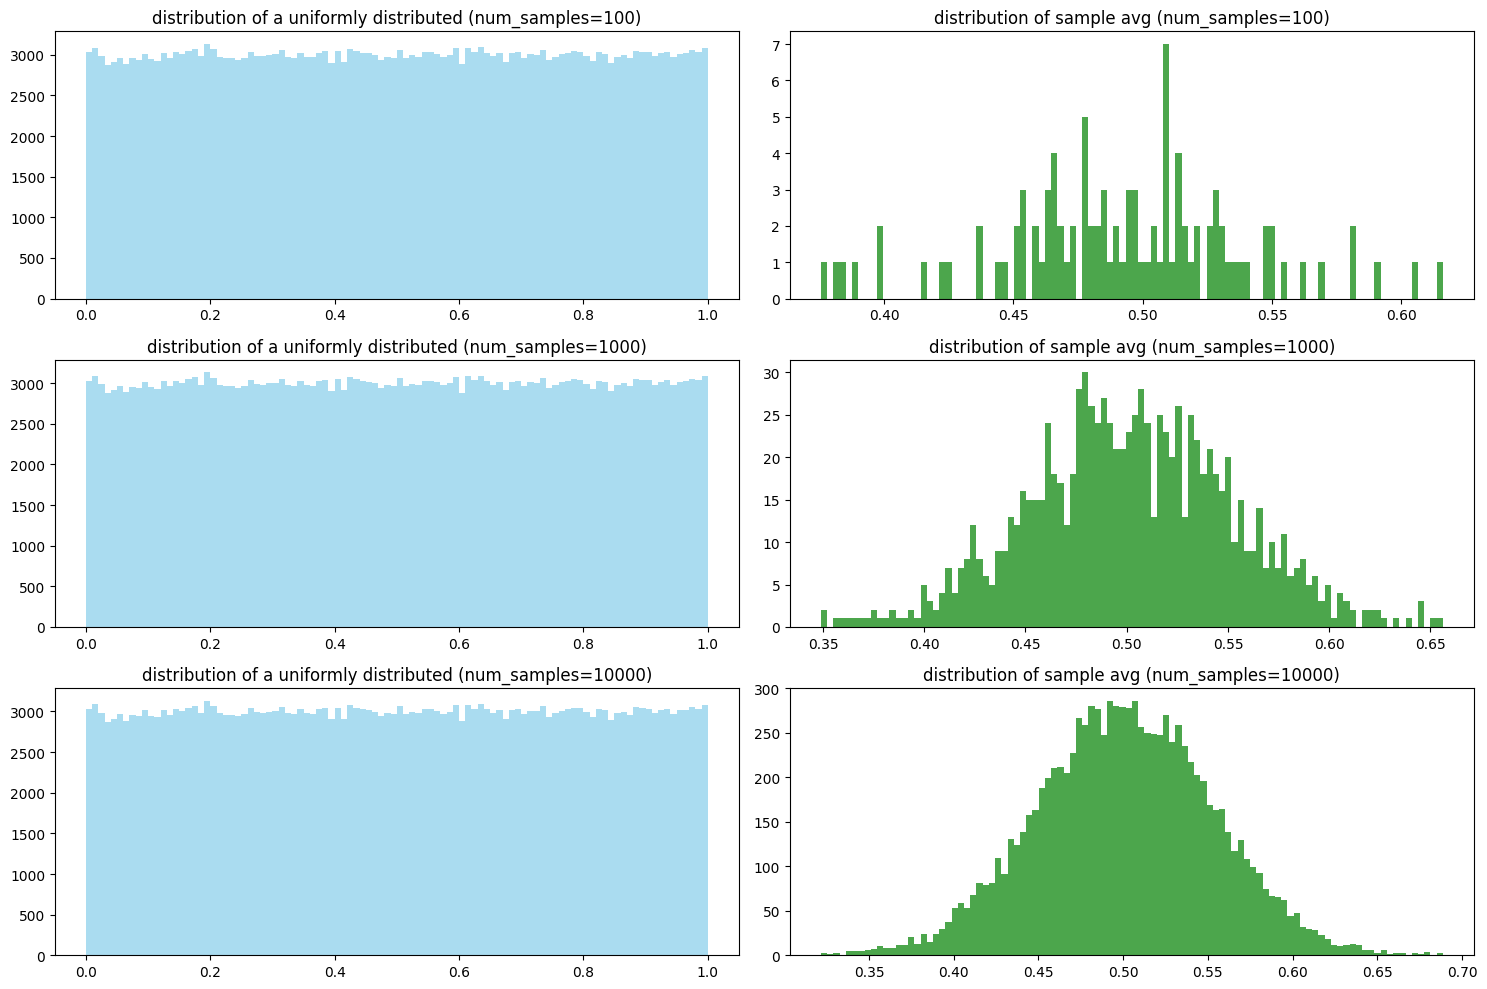

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # 전체 그래프의 크기 설정

# 각각의 num_samples에 대해 반복
for idx, num_samples in enumerate(num_samples_list):
    # 샘플의 평균을 저장할 배열을 초기화
    sample_means = []

    # 샘플을 생성하고 각 샘플의 평균을 계산
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)  # ⭐모집단에서 중복 없이 샘플을 선택⭐ => 비복원 추출
        sample_mean = np.mean(sample)     #⭐ 추출된 샘플(30명의 그룹)에 대해 평균을 계산
        sample_means.append(sample_mean)  # ⭐샘플의 평균 값을 sample_means 리스트에 추가
                                          #  100개,1000개,10000개의 평균값이 차례대로 append

    # subplot을 설정하여 샘플 평균의 분포를 시각화
    plt.subplot(3, 2, idx * 2 + 1)
    plt.hist(population, bins=100, color='skyblue', alpha=0.7)  # 모집단의 히스토그램
    plt.title(f'distribution of a uniformly distributed (num_samples={num_samples})')

    plt.subplot(3, 2, idx * 2 + 2)
    plt.hist(sample_means, bins=100, color='green', alpha=0.7)  # 샘플 평균의 히스토그램
    plt.title(f'distribution of sample avg (num_samples={num_samples})')

# 그래프 출력
plt.tight_layout()
plt.show()

>📚광장에 모인사람들의 특성은 균등분포를 따랐었지만...
>n이 커질수록 **즉 샘플의 개수(그룹 개수)가 많을수록**  표본 평균의 분포(100,1000,10000개 그룹에서의 평균 특성 분포)가 정규분포에 가까워지는 개형이 됨을 확인
